# K Nearest Neighbors - Projeto 

Bem-vindo ao Projeto de KNN! Este será um projeto simples e muito parecido com o notebook, com a diferença de que você receberá outro conjunto de dados. Vá em frente e siga as instruções abaixo.
## Importar bibliotecas
**Importe pandas, seaborn e as bibliotecas usuais.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtenha os dados
**Leia o arquivo csv 'KNN_Project_Data' em um DataFrame**

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Verifique o cabeçalho do DataFrame.**

In [3]:
df.head() 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Análise exploratória de dados

Uma vez que esses dados são artificiais, vamos criar um grande pairplot com o Seaborn.

**Use seaborn no DataFrame para criar um pairplot com a tonalidade indicada pela coluna TARGET CLASS.**

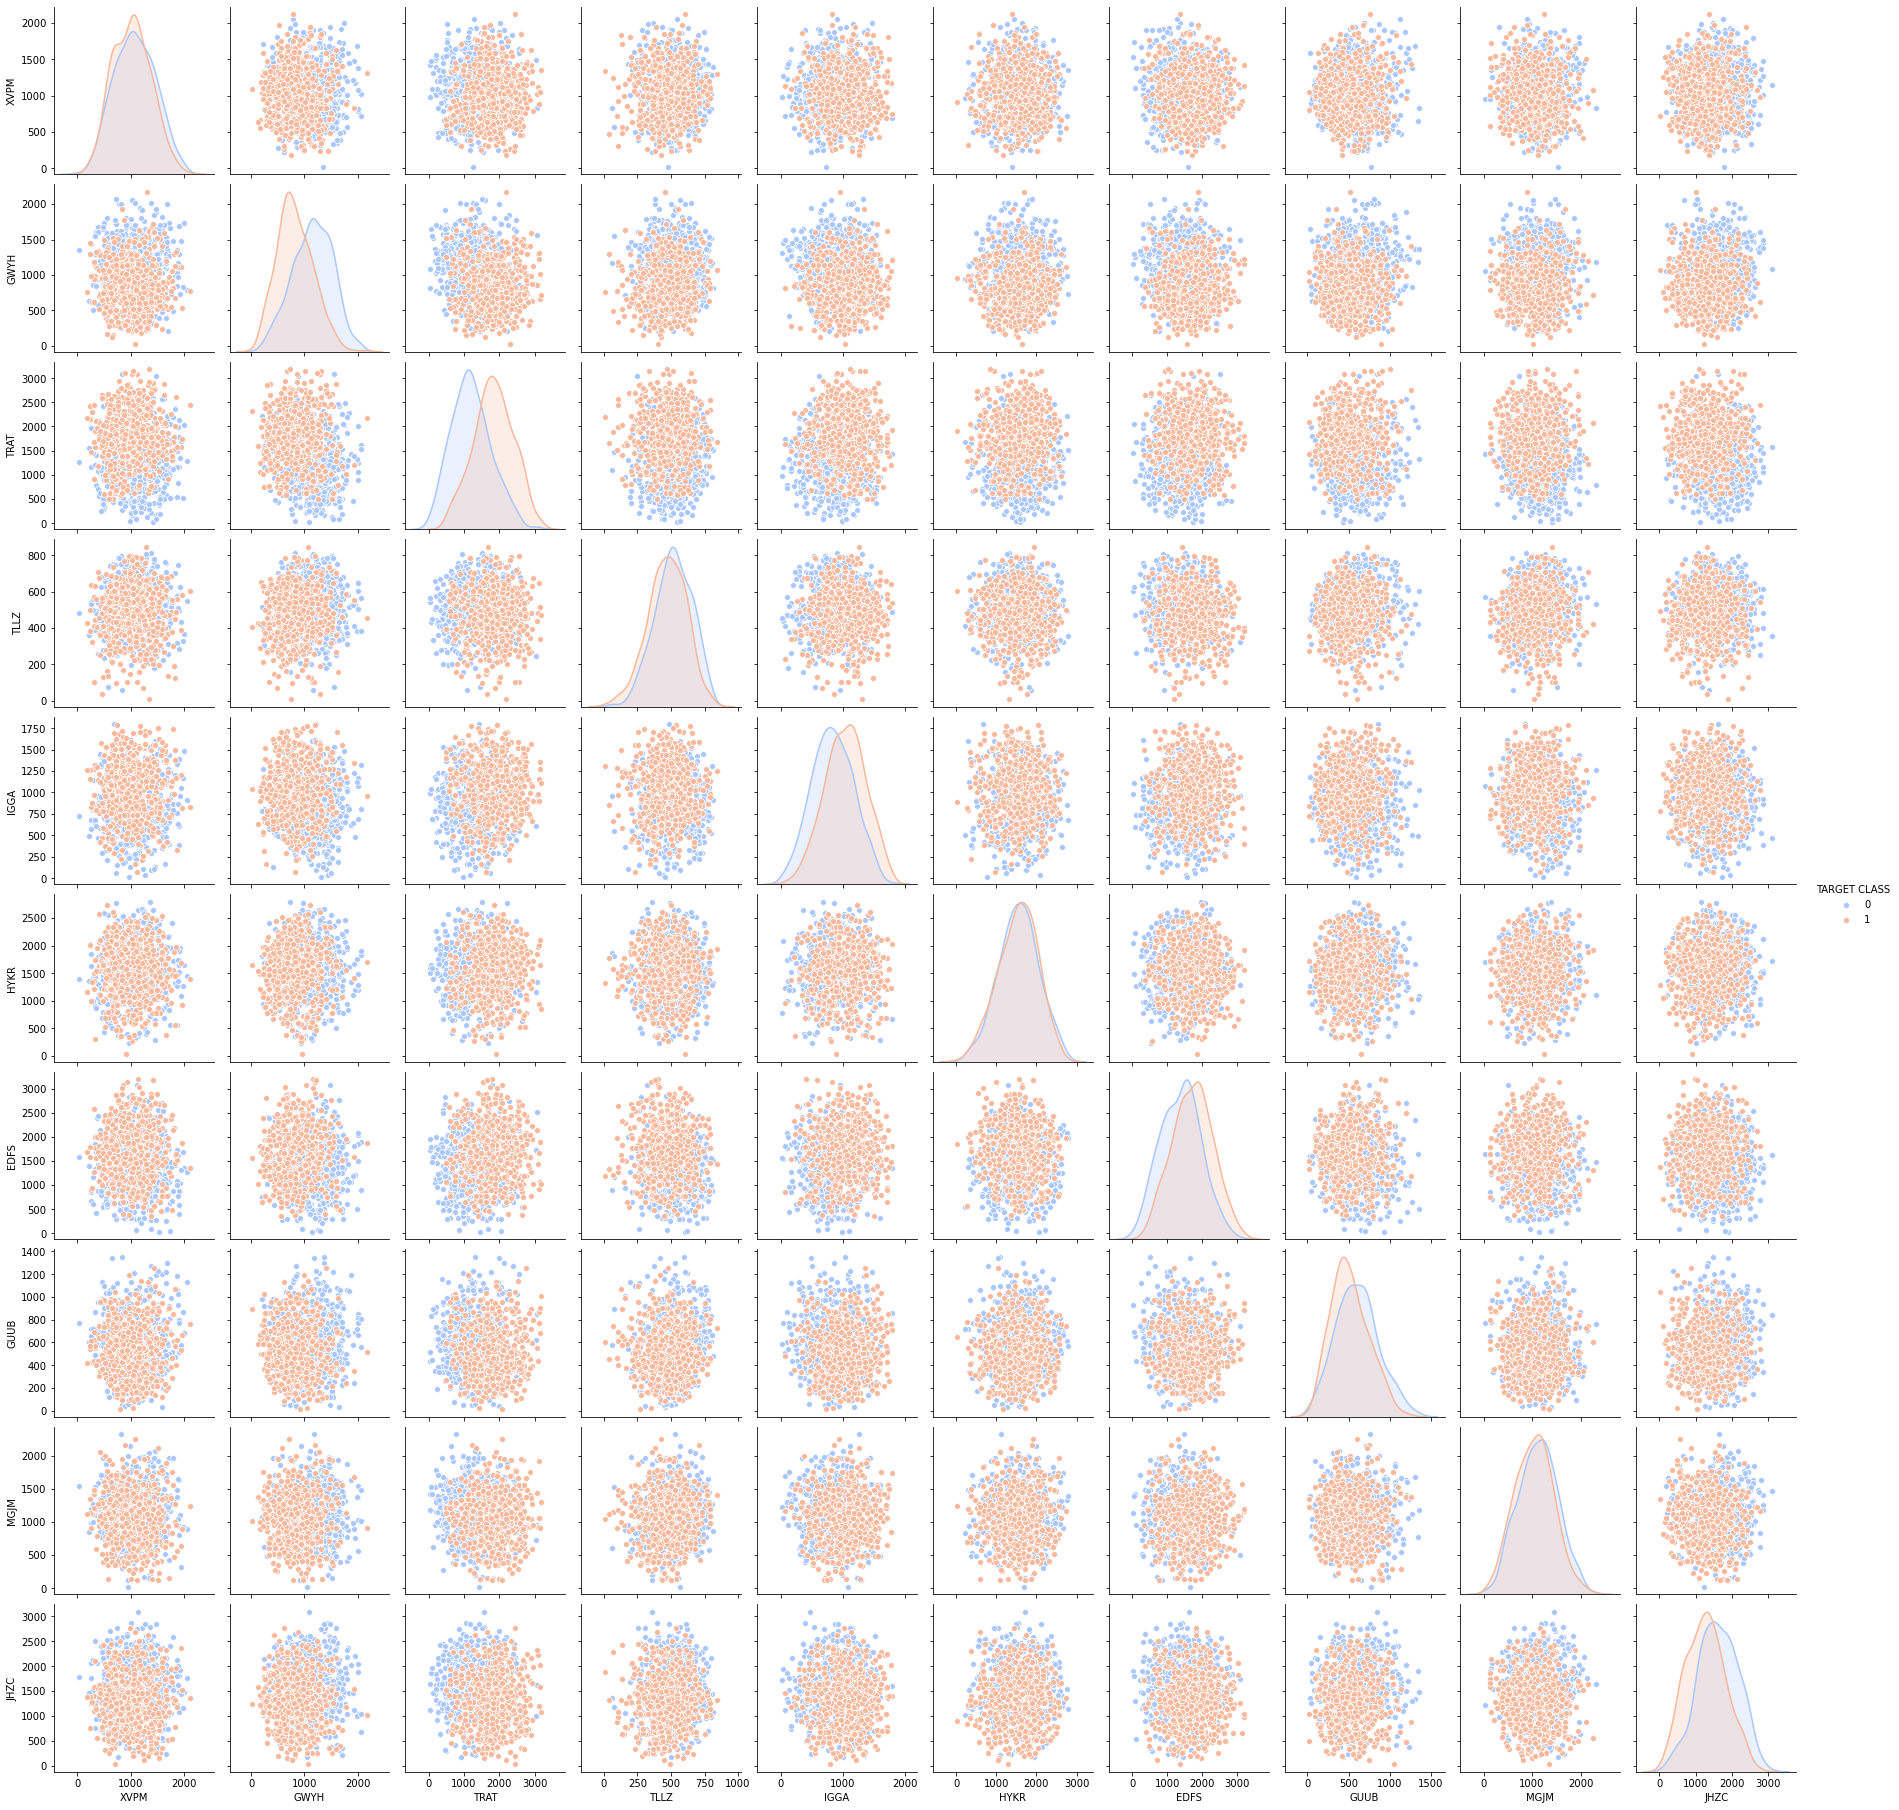

In [24]:
# ISTO VAI SER UM LOTE MUITO GRANDE
sns.pairplot(df, palette='coolwarm', hue='TARGET CLASS')

# Padronize as variáveis

Hora de para padronizar as variáveis.

**Import StandardScaler do Scikit-learn.**

In [5]:
from sklearn.preprocessing import StandardScaler

**Crie um objeto StandardScaler() chamado scaler.**

In [6]:
scaler = StandardScaler()

**Use o método fit() do objeto para treinar o modelo.**

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use o método .transform () para transformar os parâmetros em uma versão padronizada.**

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou.**

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Divisão treino-teste

**Use o método train_test_split para dividir seus dados em um conjunto treino e teste.**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

# Usando o KNN

**Importe o KNeighborClassifier do scikit learn.**

In [12]:
from sklearn.neighbors import KNeighborsClassifier

**Crie uma instância do modelo KNN com n_neighbors = 1**

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

**Ajuste este modelo KNN aos dados de treinamento.**

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

**Use o método de previsão para prever valores usando seu modelo KNN e X_test.**

In [15]:
pred = knn.predict(X_test)

**Crie uma matriz de confusão e um relatório de classificação.**

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,pred))

[[104  42]
 [ 37 117]]


In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       146
           1       0.74      0.76      0.75       154

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



# Escolhendo o valor K
Vamos continuar usando o método do cotovelo para escolher um bom valor K!

**Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Consulte o notebook se você estiver confuso nesta etapa.**

In [19]:
error_rate = []

# Levará algum tempo
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Agora crie o seguinte gráfico usando as informações do seu loop.**

Text(0, 0.5, 'Error Rate')

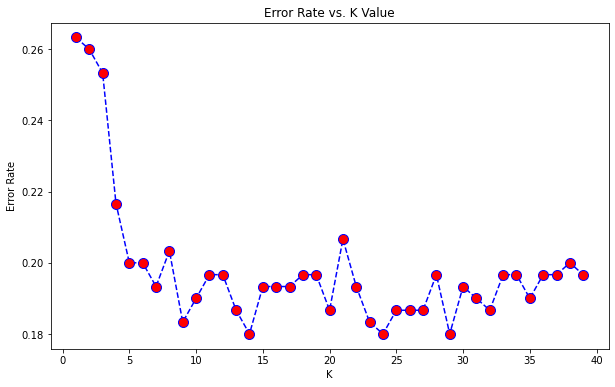

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Treine seu modelo novamente com novo valor K

**Treine novamente seu modelo com o melhor valor K (até você para decidir o que deseja) e re-faça o relatório de classificação e a matriz de confusão.**

In [21]:
# Agora com K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Com K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Com K=30


[[118  28]
 [ 30 124]]


              precision    recall  f1-score   support

           0       0.80      0.81      0.80       146
           1       0.82      0.81      0.81       154

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

